In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import scipy as scp
import scipy.linalg
from scipy.sparse.linalg import inv

## Theory And Derivation

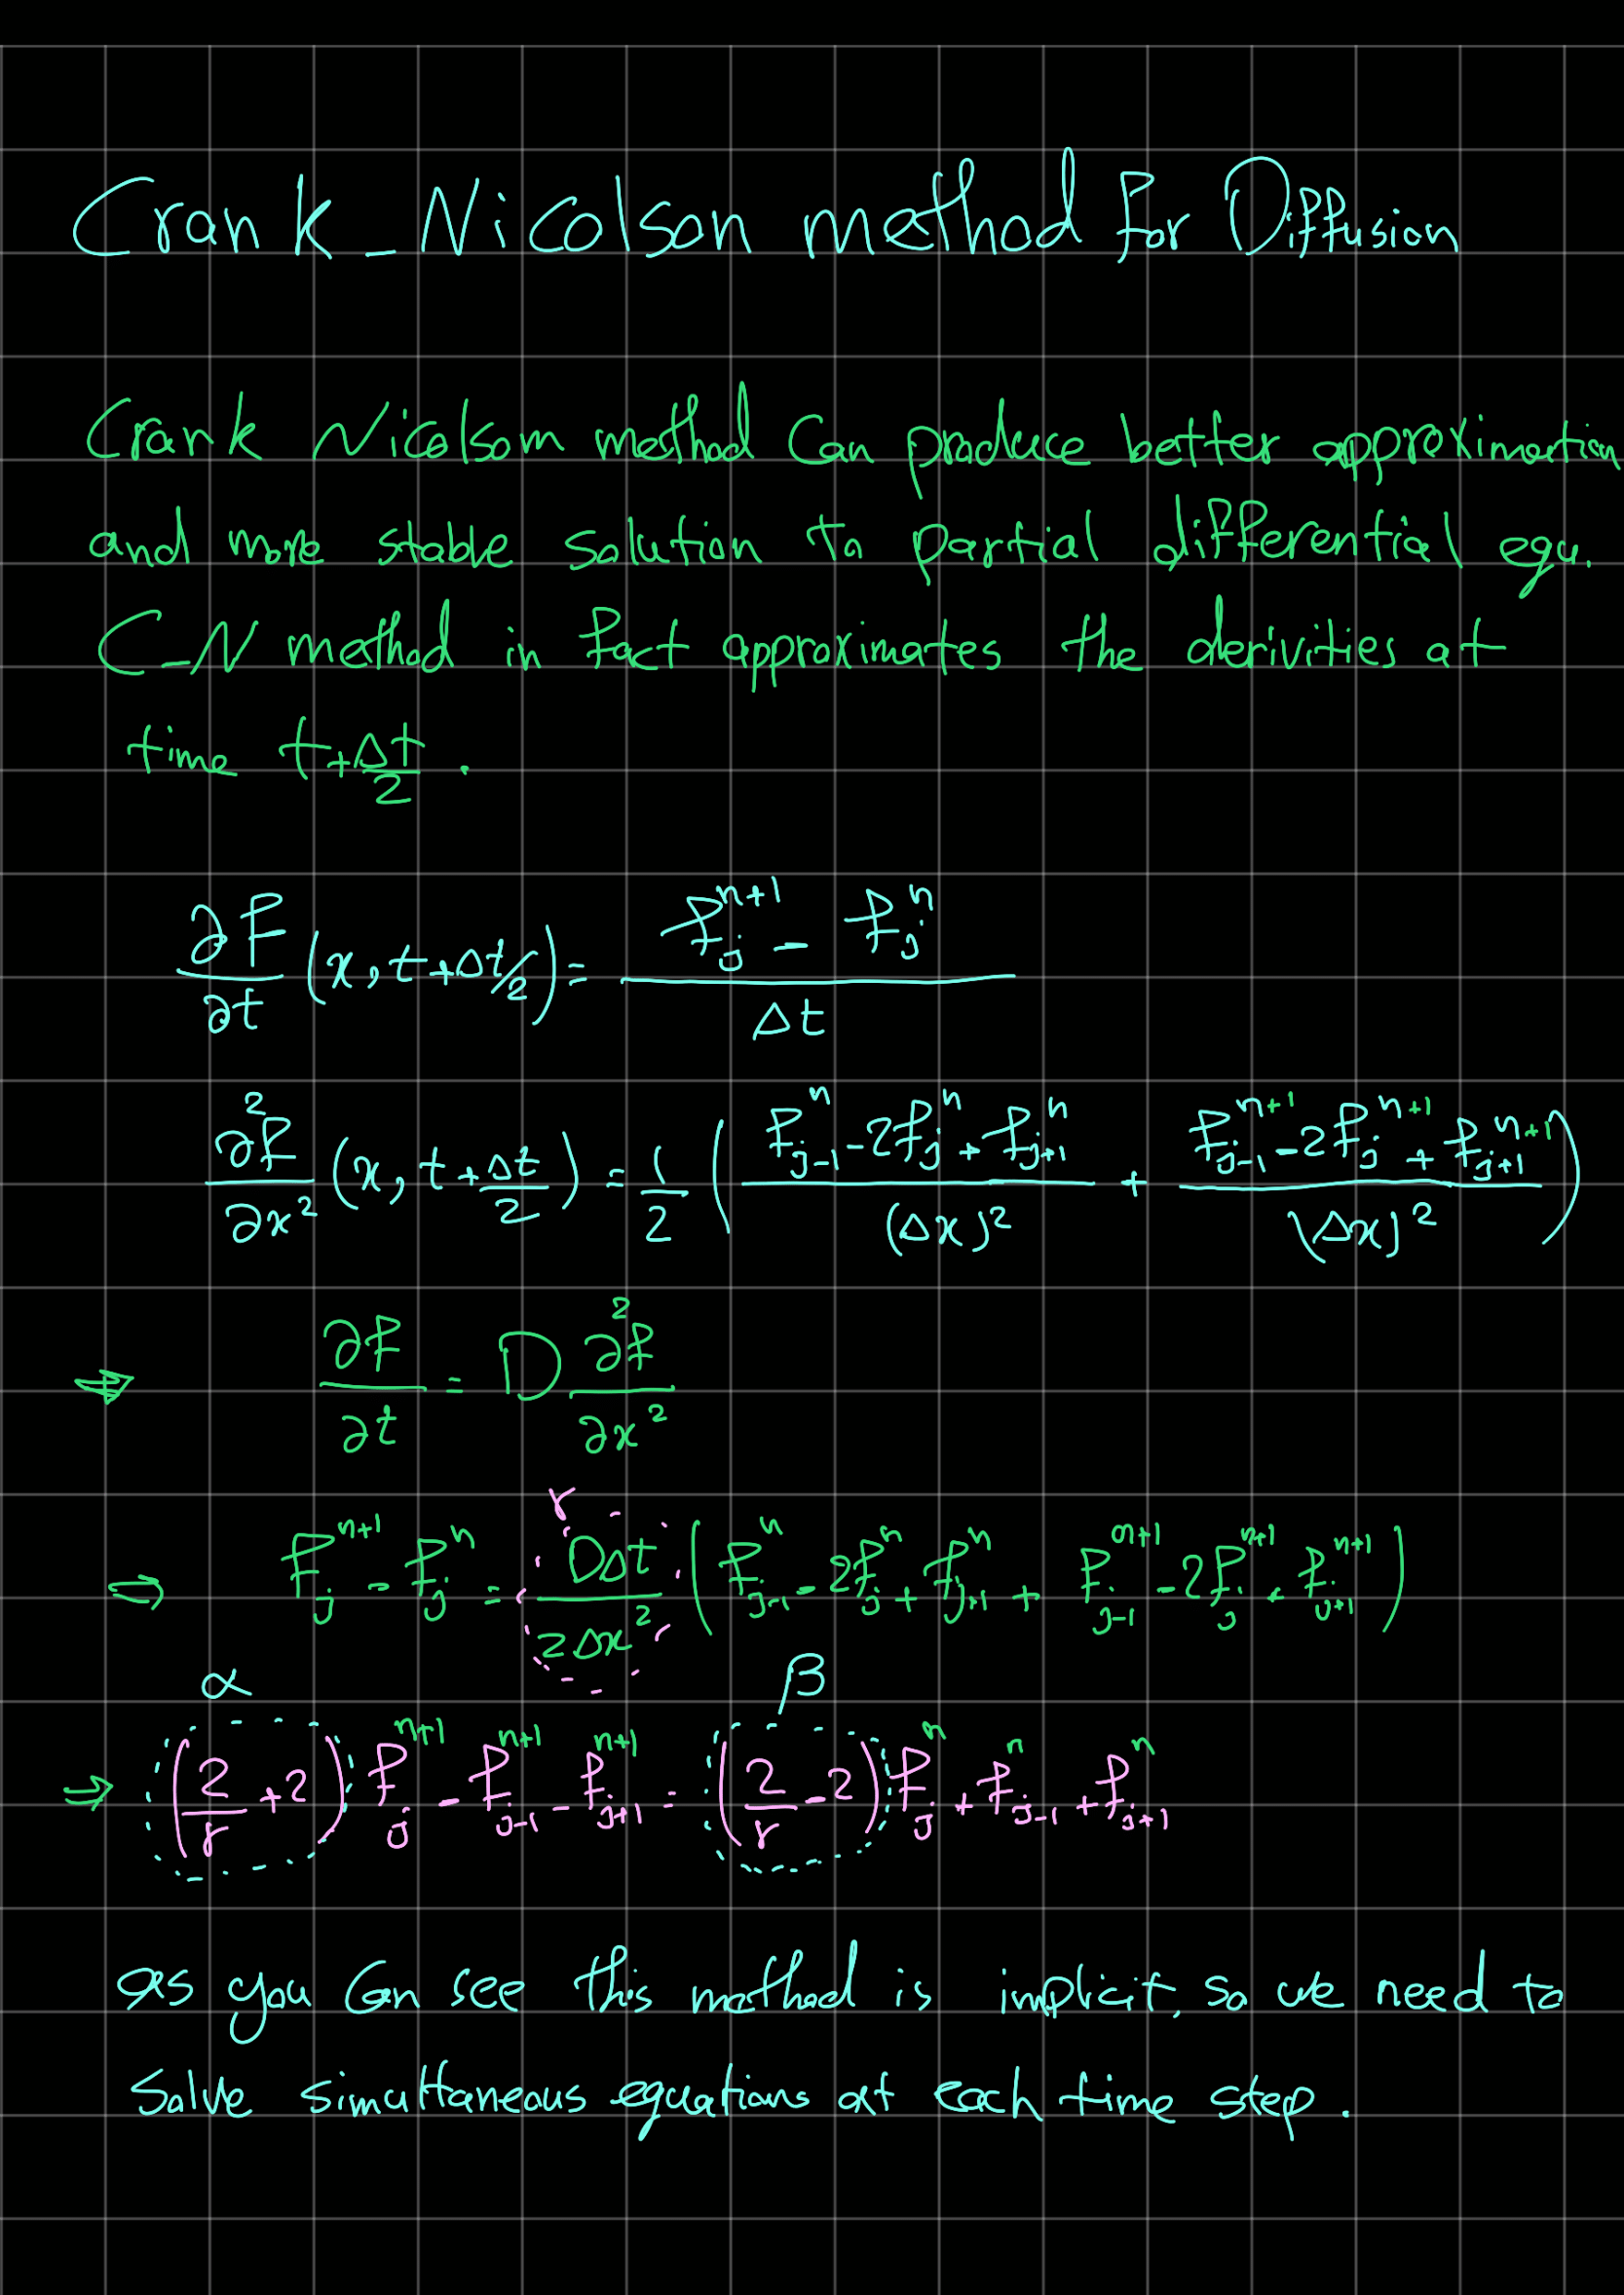

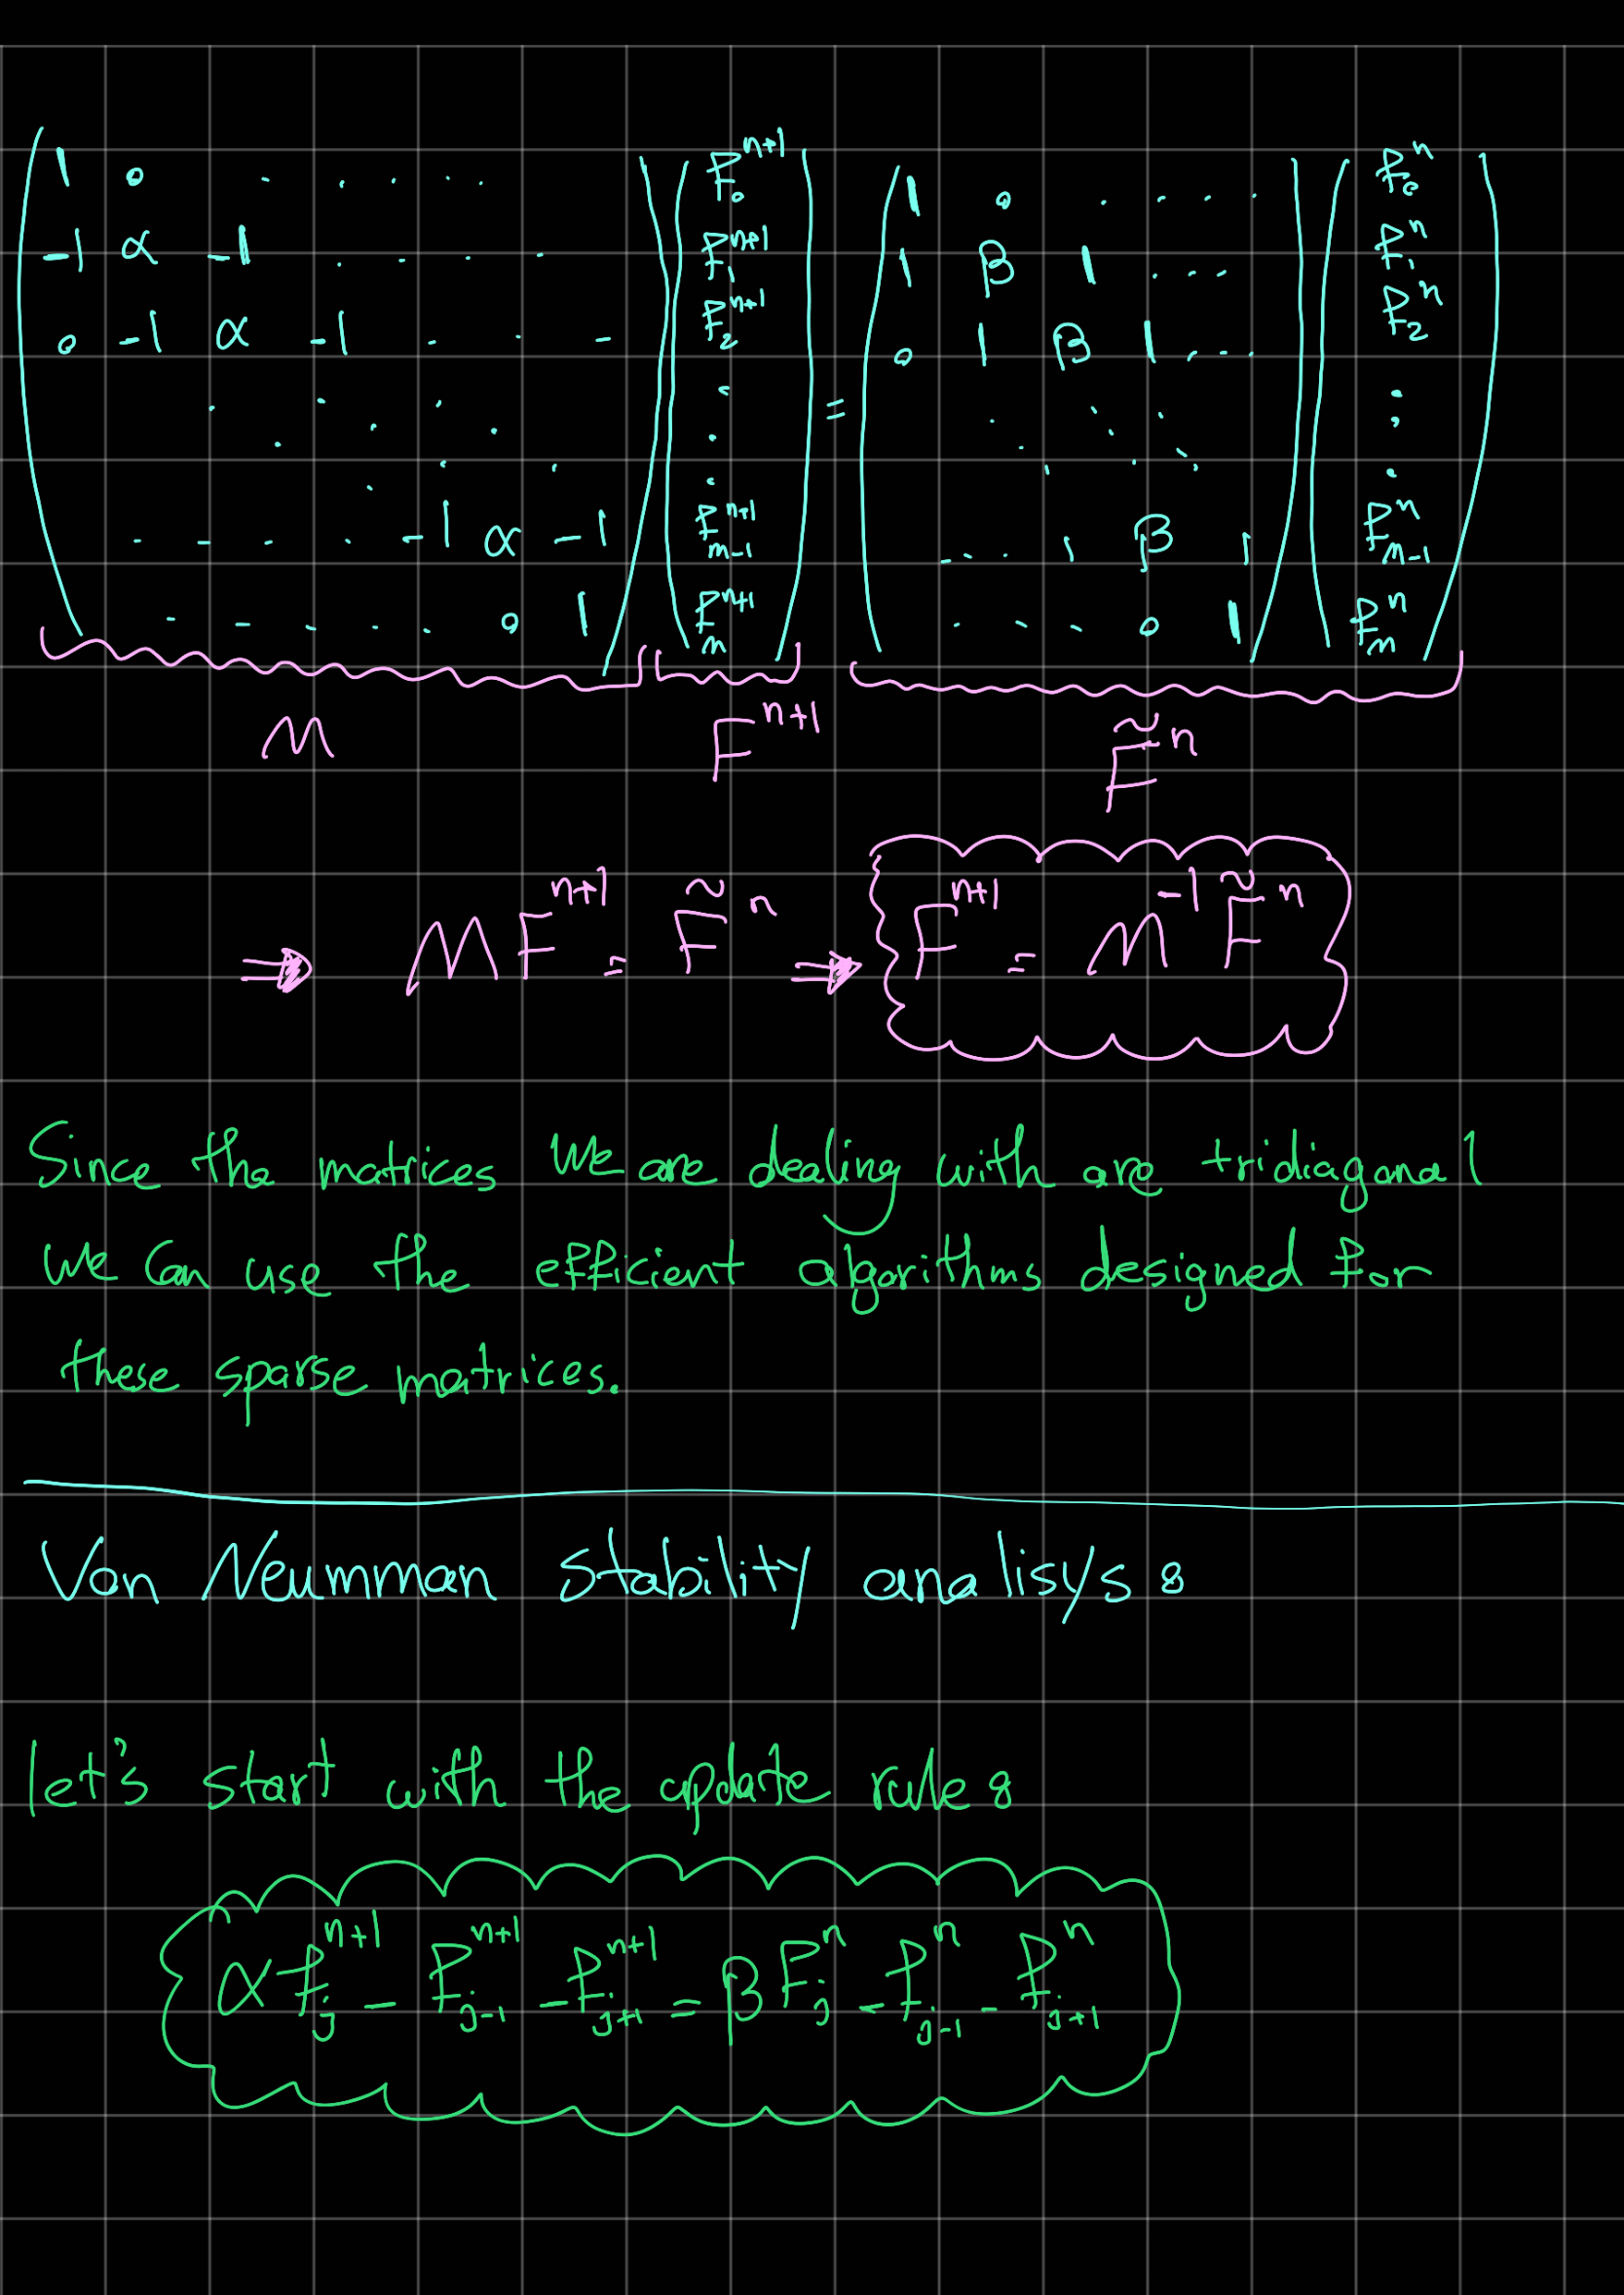

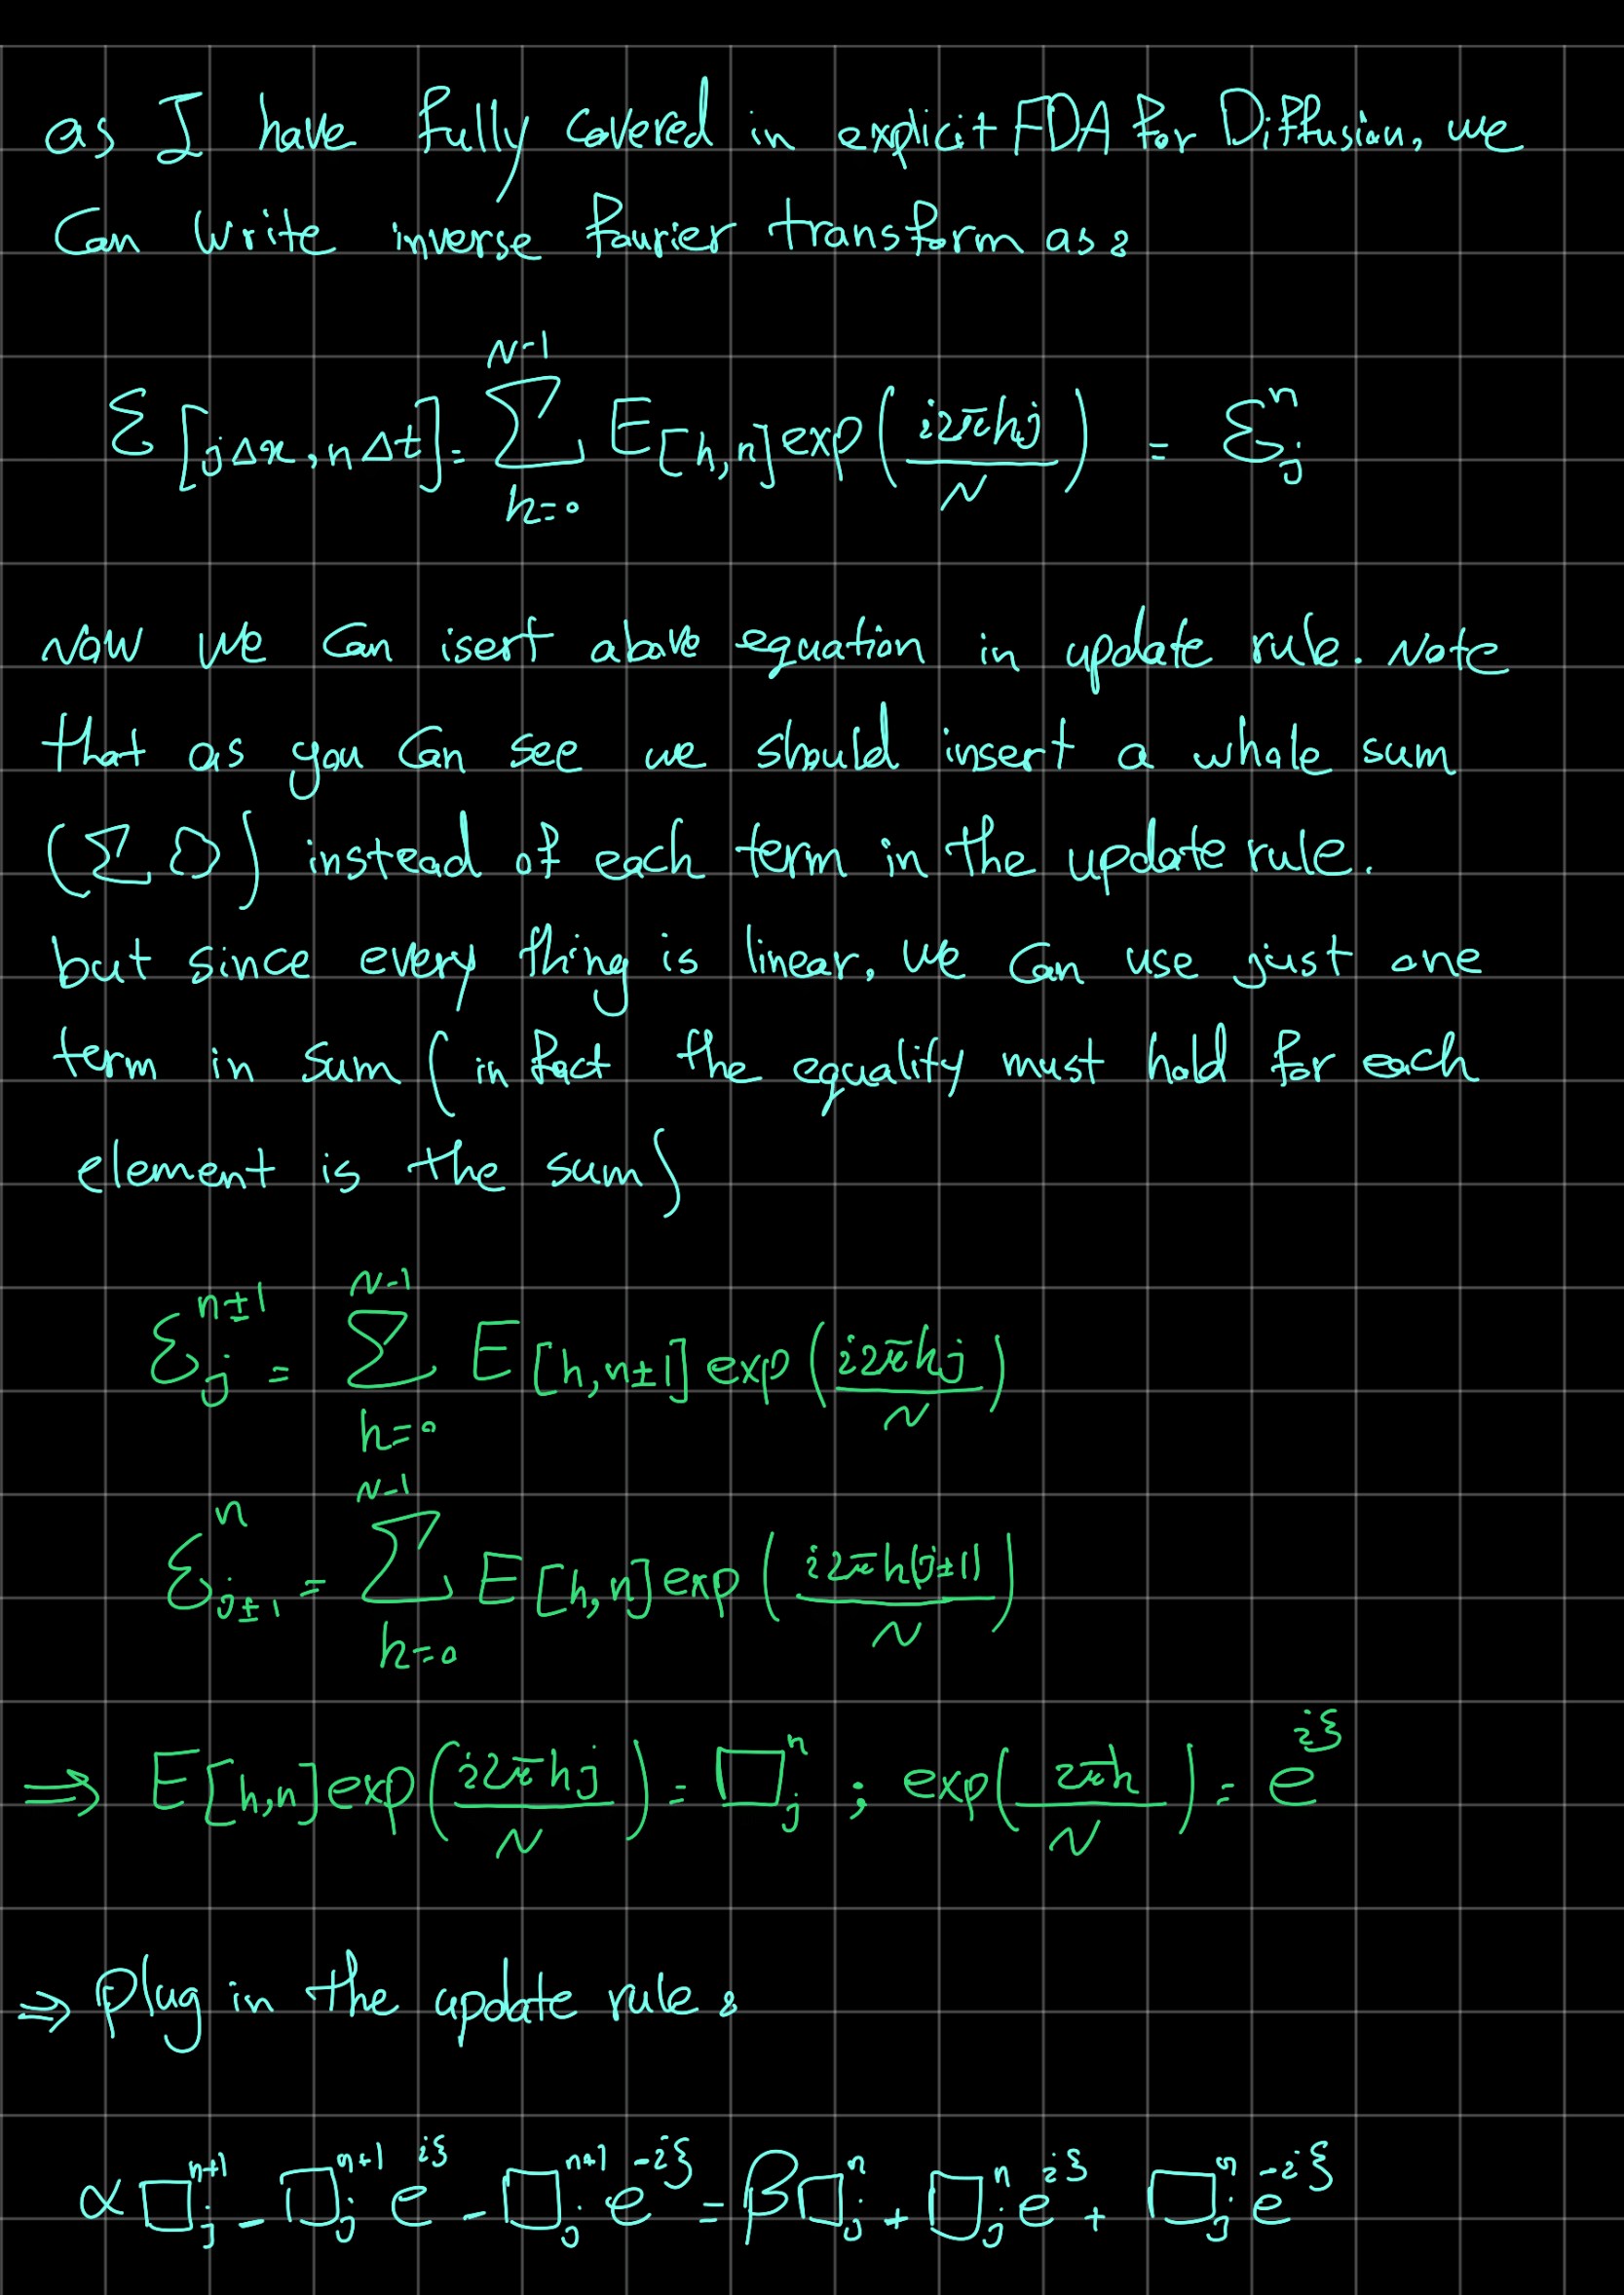

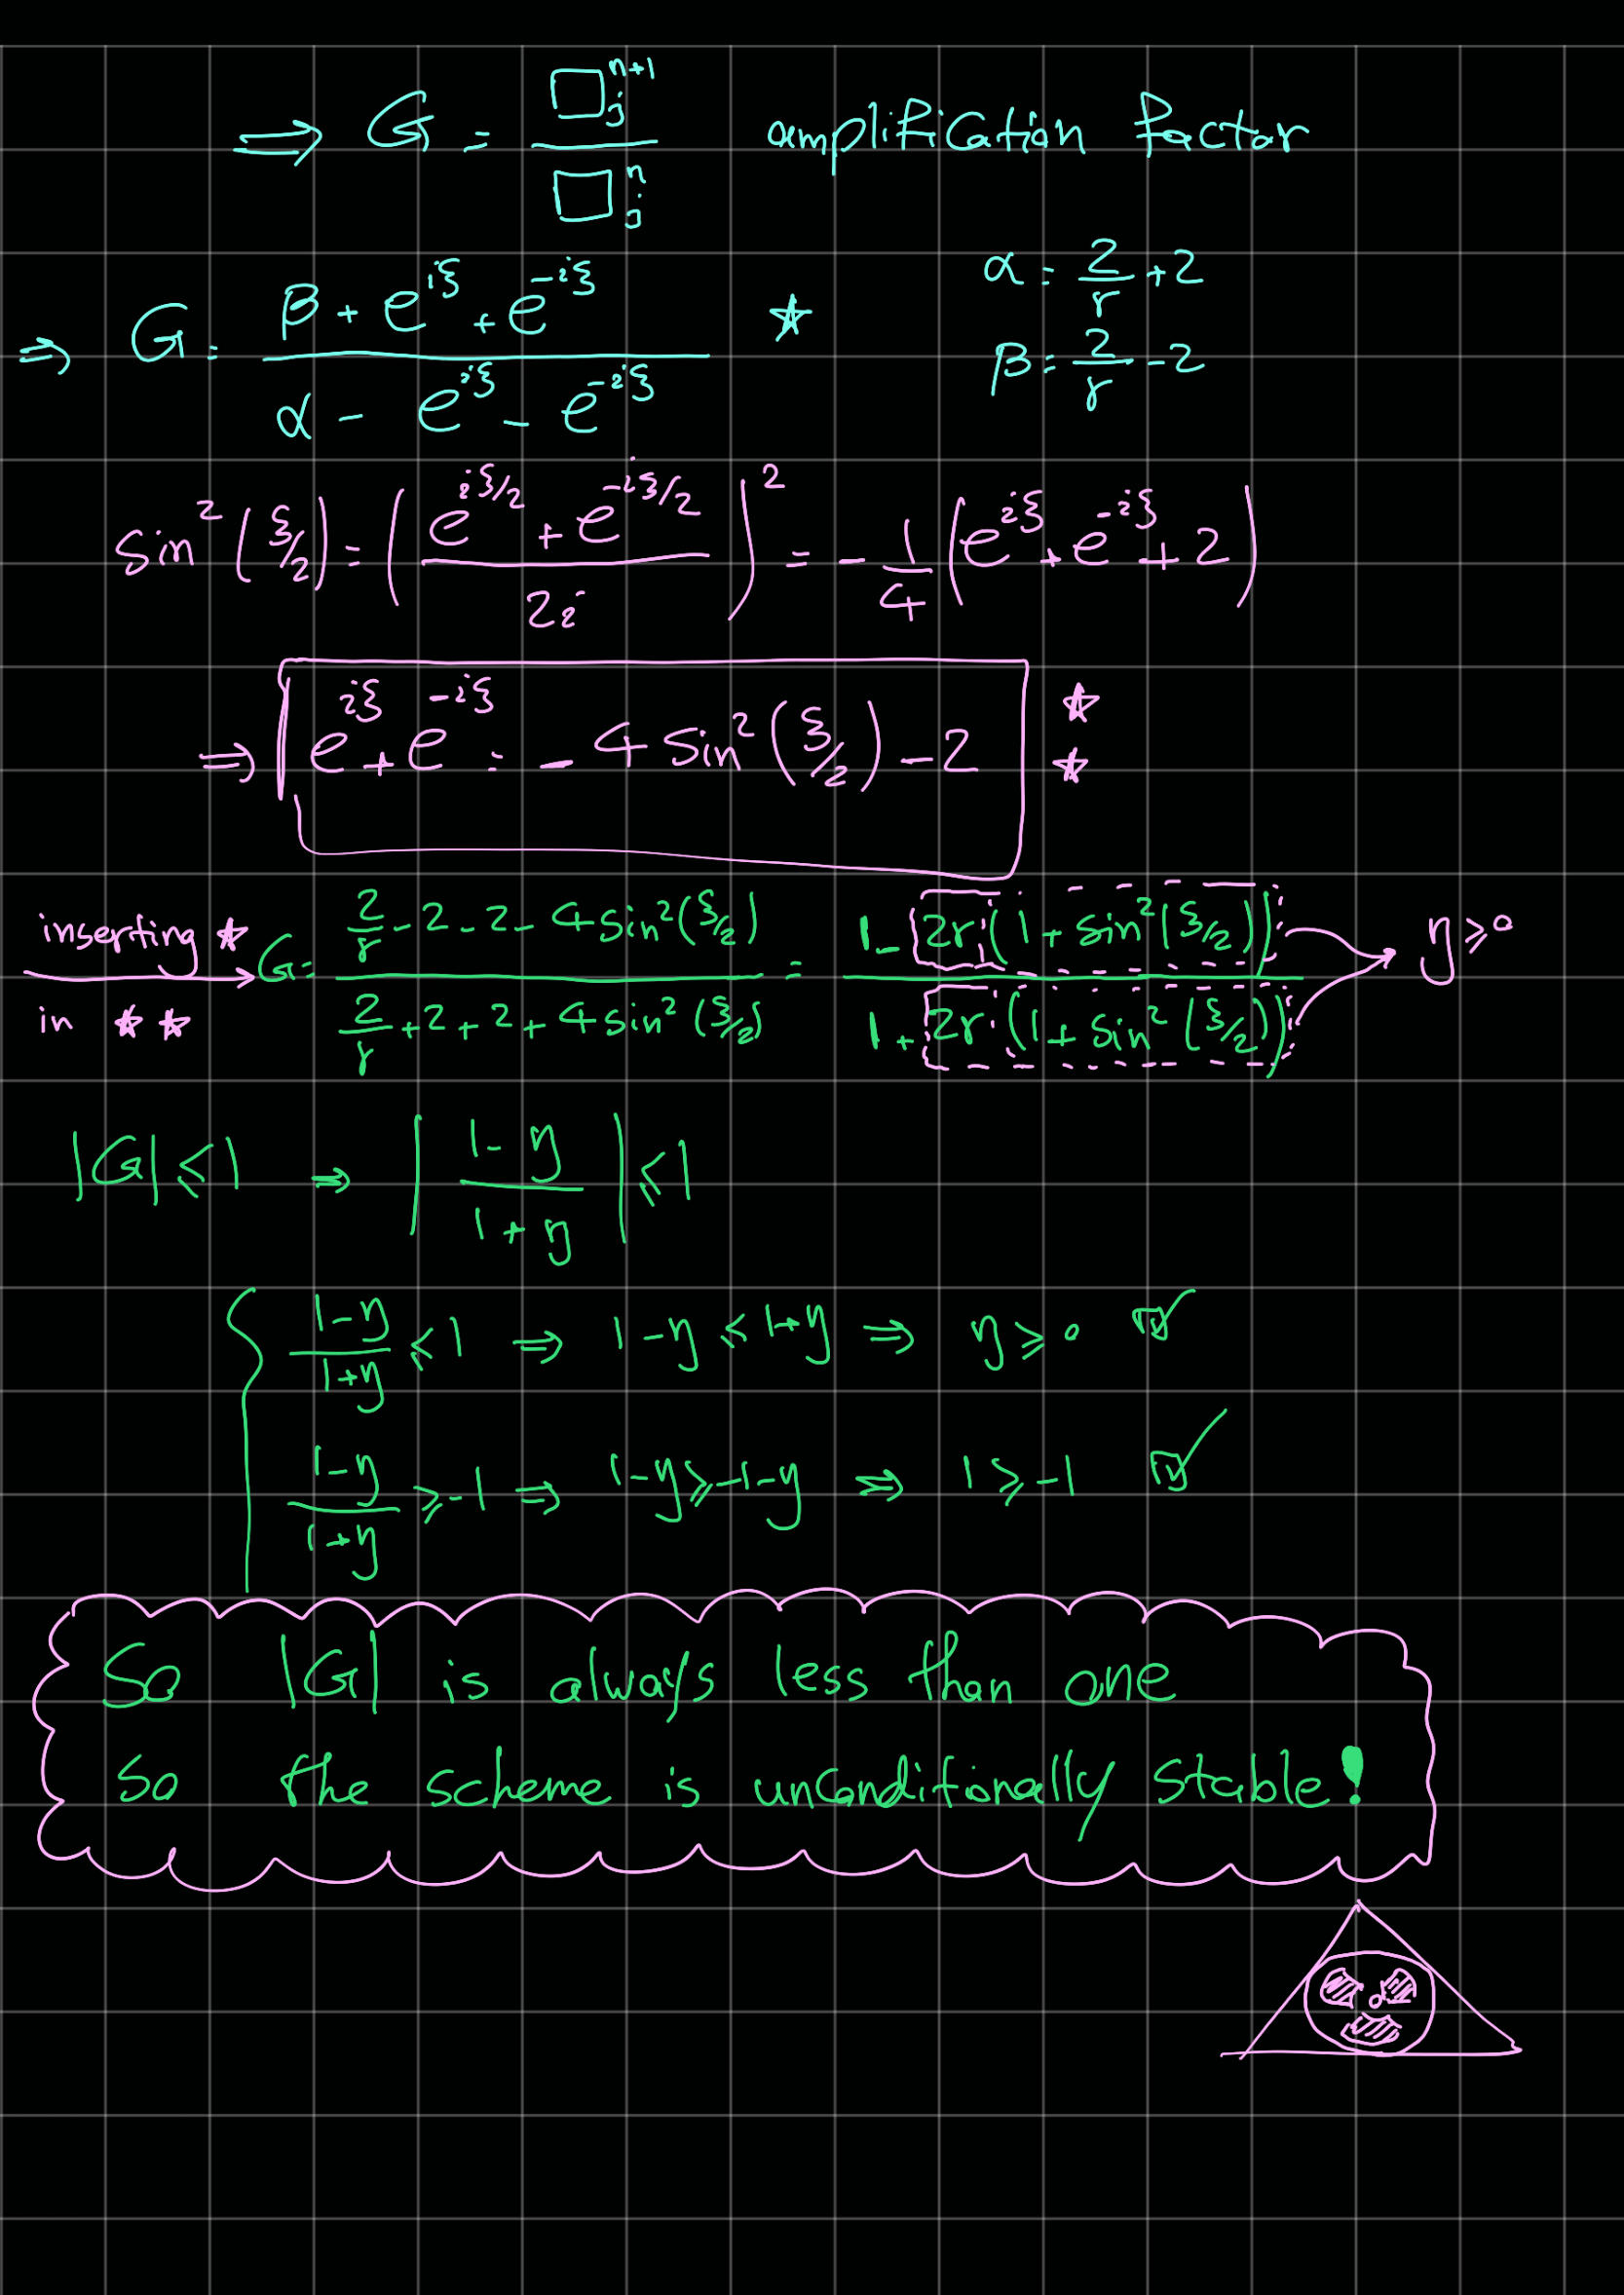

In [132]:
dt = 1e-3

dx = 1e-3
D = 1
r = dt*D/(2*dx**2)
alpha = (2/r) + 2
beta = (2/r) - 2

In [154]:
x_end = 1
t_end = 1

xList = np.arange(0,x_end+dx, dx)
tList = np.arange(0,t_end, dt)
M = xList.shape[0]
N = tList.shape[0]

F = np.exp(-((xList-0.5)/0.2)**2)
F[0] = 0
F[-1] = 0

Fdata = np.zeros((tList.shape[0], xList.shape[0]))

In [155]:
plt.plot(xList, F)

In [156]:
upDiag = np.ones(M)*(-1)
Diag = np.ones(M)*alpha
lowDiag = np.ones(M)*(-1)
upDiag[1] = 0
lowDiag[-2] = 0


In [157]:
Mat = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
mat = Mat.toarray()

In [158]:
upDiag_RHS = np.ones(M)*(1)
Diag_RHS = np.ones(M)*beta
lowDiag_RHS = np.ones(M)*(1)
upDiag_RHS[1] = 0
lowDiag_RHS[-2] = 0


In [159]:
Mat_RHS = spdiags([lowDiag_RHS, Diag_RHS, upDiag_RHS],[-1,0,1],M,M)
mat_RHS = Mat.toarray()

In [160]:
invMat = inv(Mat)
for i in range(N):
    Fdata[i,:] = F
    RHS = Mat_RHS.dot(F)
    F = (invMat).dot(RHS)


/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


<IPython.core.display.Javascript object>


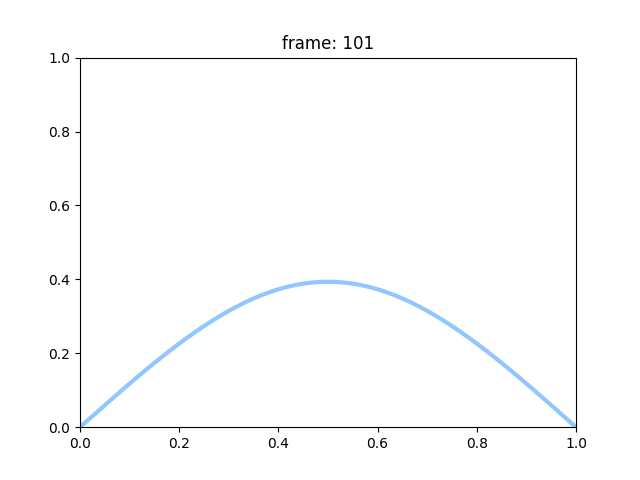

In [163]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    return line,
def animate(i):
    ydata = Fdata[i,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=True)